# Taxi Networks simulation

In this notebook, we will demonstrate code that simulates the behavior of taxis
in queueing networks. We are modeling this using a Jackson network, which models
taxis as customers traveling in the network. Taxis queue at each station $i$,
and are served by customers arriving at a rate of $\mu_i$. After a customer
gets on a taxi, it travels to another station $j$ with probability
$r_{ij}$. We assume the taxis 

In [1]:
import numpy as np
import scipy.linalg as la
import scipy.stats as sps
import networkx as nx
from matplotlib import pyplot as plt
from simulation import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [10]:
# create a dense network with 3 nodes, same customer arrival rate 1.1 at each node, 
# and same travel time of 1, and initialized with 10 cars at each station. 
test_full_nw = full_network(3, 1.1, 1, 10)

# creates graph representing the queuing system
test_full_nw.write_graphviz('full.dot')

# creates a network with the same parameters as above
# with rate of attacks = 1 at each node, 
# and with transition probabilities from station i to i+1 equal to 1.
test_nw = l_to_r_attack(3, 1.1, 1, 10, 1)
test_nw.write_graphviz('l2r.dot')

r_to_l_attack(3, 1.1, 0.1, 100, 0.1).write_graphviz('r2l.dot')

In [3]:
# check the parameters of the network.
for node in test_nw.graph.values():
    if isinstance(node, StationNode):
        print node.r
    else:
        print node.rid


{'0->2': 0.2619047619047619, '0->1': 0.7380952380952381}
{'1->0': 0.2619047619047619, '1->2': 0.7380952380952381}
{'2->1': 0.5, '2->0': 0.5}
2
1
1
0
0
2


In [4]:
# print the state of the network at each jump
test_nw = l_to_r_attack(2, 1.1, 1, 10, 1)
for _ in range(5):
    test_nw.jump()
    print test_nw.get_last_history()

[NodeState(id=0, n=9, lost=0), NodeState(id=1, n=10, lost=0), NodeState(id='0->1', n=1, lost=0), NodeState(id='1->0', n=0, lost=0)]
[NodeState(id=0, n=8, lost=0), NodeState(id=1, n=10, lost=0), NodeState(id='0->1', n=2, lost=0), NodeState(id='1->0', n=0, lost=0)]
[NodeState(id=0, n=8, lost=0), NodeState(id=1, n=11, lost=0), NodeState(id='0->1', n=1, lost=0), NodeState(id='1->0', n=0, lost=0)]
[NodeState(id=0, n=8, lost=0), NodeState(id=1, n=12, lost=0), NodeState(id='0->1', n=0, lost=0), NodeState(id='1->0', n=0, lost=0)]
[NodeState(id=0, n=7, lost=0), NodeState(id=1, n=12, lost=0), NodeState(id='0->1', n=1, lost=0), NodeState(id='1->0', n=0, lost=0)]


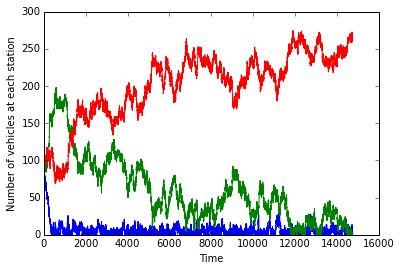

Mean counts:  [5.9929899999999998, 60.435989999999997, 200.43982]


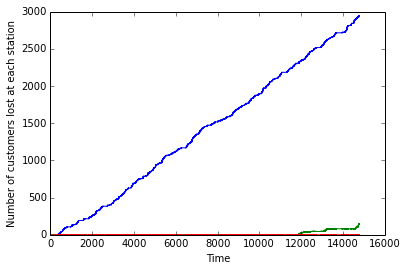

Mean losses:  [1386.23867, 12.36777, 0.0]


In [7]:
from collections import Counter

test_nw = r_to_l_attack(3, 1.1, 0.1, 100, 0.1)

times, counts, loss = simulate(test_nw, 100000)
for y in zip(*counts):
    plt.plot(times, y)
    
plt.ylabel('Number of vehicles at each station')
plt.xlabel('Time')
plt.show()
print 'Mean counts: ', map(np.mean, zip(*counts))

for y in zip(*loss):
    plt.plot(times, y)
plt.ylabel('Number of customers lost at each station')
plt.xlabel('Time')
plt.show()
print 'Mean losses: ', map(np.mean, zip(*loss))

# Sandbox for math

In [5]:
def mva(v, mu, n):
    dim = len(v)
    gamma = v / mu
    L = np.zeros(dim)
    for k in range(1, n+1):
        L1 = np.ones(dim) + L
        f = k / float(gamma.dot(L1))
        L = f * gamma * L1
    return L

def get_first_evac(m):
    evals, evecs = la.eig(m, right=True)
    max_index = max(enumerate(evals), key=lambda x: abs(x[1]))[0]
    return evecs[:,max_index]

p_real = 1
p_virt = 0.0001
n = 5
m = linear_network(n, p_virt, p_real, 0).to_matrix()
mu = [(p_real + p_virt)]*(n-1) + [p_real]
print np.round(m, 5)

first_evec = get_first_evac(m)
first_evec /= first_evec[-1]

print first_evec / mu
first_evec = first_evec.astype(float)
print mva(first_evec, mu, n*30)

/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:27: ComplexWarning: Casting complex values to real discards the imaginary part


[[ 0.       0.24998  0.24998  0.24998  0.25   ]
 [ 0.25007  0.       0.24998  0.24998  0.25   ]
 [ 0.24998  0.25007  0.       0.24998  0.25   ]
 [ 0.24998  0.24998  0.25007  0.       0.25   ]
 [ 0.24998  0.24998  0.24998  0.25007  0.     ]]
[ 0.99984002+0.j  0.99992000+0.j  0.99992001+0.j  0.99992001+0.j
  1.00000000+0.j]
[ 29.93806828  29.99995281  29.99995777  29.99995777  30.06206337]


In [6]:
m = np.array([[0,0,0,0,0.25], [1,0,0,0,0.25], [0,1,0,0,0.25], [0,0,1,0,0.25], [0,0,0,1,0]])

first_evec = get_first_evac(m)
first_evec /= first_evec[-1]
print first_evec


[ 0.25+0.j  0.50+0.j  0.75+0.j  1.00+0.j  1.00+0.j]
